In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Conv2D , GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train,x_test = x_train/255 , x_test/255
y_train,y_test = y_train.flatten(),y_test.flatten() #the targets are 2 dimensional arrays so we must flatten them
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [4]:
K = len(set(y_train))
K

10

In [5]:
#data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [6]:
#Build the model
i = Input(shape = x_train[0].shape)
x = data_augmentation(i)
x = Conv2D(32,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)
model = Model(i,x)

In [ ]:
#we Compile our model
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
#We train our model
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 50)


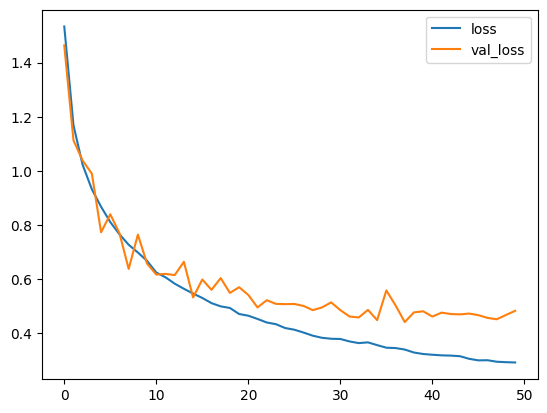

In [8]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()